In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle


with open('./data/df_postcnt_per_tag_year.pkl', 'rb') as f:
    df_postcnt_per_tag_year = pickle.load(f)

with open('./data/df_postcnt_per_tag_year_01.pkl', 'rb') as f:
    df_postcnt_per_tag_year_01 = pickle.load(f)

In [2]:
df_postcnt_per_tag_year_01

,year,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2008,2050,2724,0,4279,7460,1415,8,1,927,...,1,0,12,5874,301,683,510,152,136,841
1,2009,12844,18720,0,23871,45933,9576,521,0,6790,...,35,0,160,23020,1423,4319,3073,1223,714,3666
2,2010,26961,43456,0,54239,75244,22790,2260,2,15605,...,1029,0,523,30831,2310,9006,6005,3364,1154,6589
3,2011,41986,89567,0,98396,112191,47399,5825,14,32406,...,3789,0,1197,38642,3653,14966,9668,6466,2069,11353
4,2012,64004,135746,1,143949,137814,74605,12161,751,50834,...,7361,0,2349,36218,6723,19903,13094,10072,3851,16965
5,2013,96035,194759,50,189616,164444,112346,22160,3038,77081,...,10435,0,4394,33237,12814,26628,17984,13379,5522,21592
6,2014,115792,234094,1020,215698,161798,132472,30738,5658,89781,...,13162,18,5823,26762,16445,29077,19429,18118,7186,23734
7,2015,136736,254793,7139,214557,154204,132246,40573,8987,88332,...,16704,378,7094,23124,21573,28149,18861,20962,8742,23991
8,2016,157980,263553,20067,196216,148463,126884,44271,15239,83641,...,18313,2623,9203,21077,23280,24173,16618,22287,10471,22489
9,2017,191445,249398,34388,173865,131036,116893,50900,23167,77738,...,17005,8614,11747,18193,25973,21558,15413,23152,11560,20731


tag

In [3]:
# df_postcnt_per_tag_year

df_postcnt_per_tag_year_melt = df_postcnt_per_tag_year.melt(id_vars = ['year'], value_vars=df_postcnt_per_tag_year.columns[1:])

df_postcnt_per_tag_year_01_melt = df_postcnt_per_tag_year_01.melt(id_vars = ['year'], value_vars=df_postcnt_per_tag_year_01.columns[1:])

In [4]:
# df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)
df_postcnt_top10 = df_postcnt_per_tag_year_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(10)


df_postcnt_01_top10 = df_postcnt_per_tag_year_01_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(10)

In [5]:
df_postcnt_top10

,year,variable,value
15,2023,python,106558.98333333333333329434
31,2023,javascript,54035.31666666666666660556
79,2023,c#,36836.08333333333333332782
47,2023,reactjs,35920.63333333333333330727
63,2023,java,35551.83333333333333331299
...,...,...,...
240,2008,php,1834.41666666666666666632
0,2008,python,1729.58333333333333333312
608,2008,sql_server,1617.86666666666666666634
160,2008,sql,1436.83333333333333333292


In [6]:
df_postcnt_top10['variable'] = df_postcnt_top10['variable'].str.replace('cplusplus', 'c++')
df_postcnt_01_top10['variable'] = df_postcnt_01_top10['variable'].str.replace('cplusplus', 'c++')

In [7]:
df_postcnt_top10[df_postcnt_top10['variable'] =='c++']
df_postcnt_01_top10[df_postcnt_01_top10['variable'] =='c++']

,year,variable,value
213,2013,c++,81743
212,2012,c++,62864
211,2011,c++,47759
210,2010,c++,31880
209,2009,c++,15627
208,2008,c++,3090


0 2012
1 2022


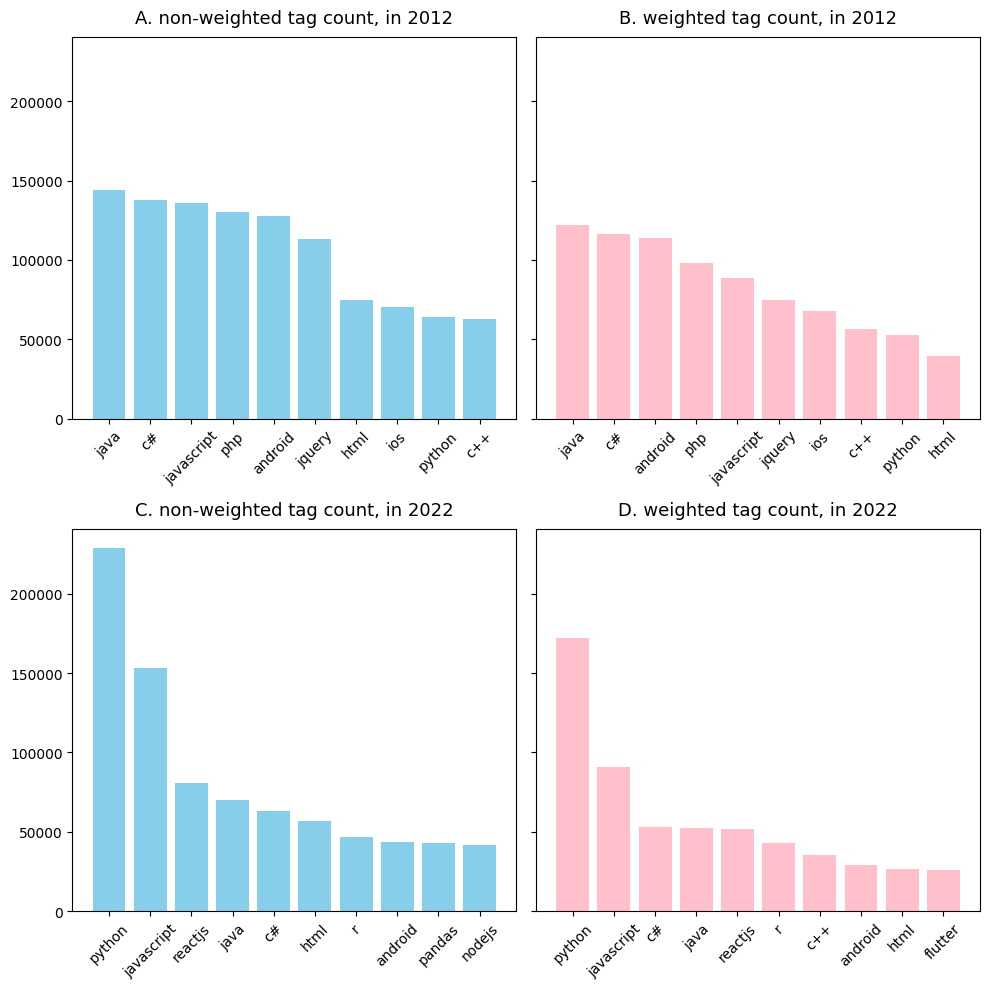

In [8]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharey=sharey, sharex=sharex)

for i, year in enumerate([2012, 2022]):
        standard_year = year
        loop_year = str(standard_year)
        title_0_arr = ['A. ', 'C. ']
        title_1_arr = ['B. ', 'D. ']
        axs[i][0].bar(df_postcnt_01_top10[df_postcnt_01_top10['year'] ==loop_year].variable
                        ,  df_postcnt_01_top10[df_postcnt_01_top10['year'] ==loop_year].value
                        ,  color = 'skyblue'
                ) # hist type
        axs[i][0].set_title(title_0_arr[i]+ 'non-weighted tag count, in '+ str(loop_year), # add title
                pad = 10,
                loc = 'center', fontsize=13)
        axs[i][0].tick_params(axis='x', rotation=45)
        

        axs[i][1].bar( df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].variable
                ,  df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].value
                ,  color = 'pink'
                ) # hist type
        axs[i][1].set_title(title_1_arr[i] + 'weighted tag count, in '+ str(loop_year), # add title
                pad = 10,
                loc = 'center', fontsize=13)
        axs[i][1].tick_params(axis='x', rotation=45)
 
# plt.suptitle("Top 10 Most Frequently Mentioned Tags", fontsize=15)    
plt.tight_layout()    
plt.show();